### Importing relevant libraries

A data science project developed in order to build a model that can predict amount of milk produced by farmers based on multiple factors including Land Size, Fodder, Fodder Type, Cow Shed, Water Collection method, Veterinary Assistace,	AI Services, number of Dairy Cows and lactation. The data was acquired from farmers in Kiambu County through field survey with the aid of determining the amount of milk production and factors revolving around in consideration of setting up  a milk processing plant.

The notebook will be presented as follows:

Data collection

Data Preprocessing & Cleansing

Exploratory data analysis & Visualisation

Data Modeling

Evaluting the Model

Model Flask API Development

### Data collection 

The columns used for the data analysis include:
Land Size, 
Fodder,
Fodder Type,
Cow Shed,
Water Collection method, 
Veterinary Assistace,
AI Services,
number of Dairy Cows and 
lactation.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Datasets

In [111]:
milk_data= pd.read_csv('C:/Users/johan/Desktop/ds/adn/Milk Baseline Data.csv')

### Data Cleaning

In [112]:
milk_data.dropna(inplace=True)

In [113]:
milk_data.head()

Land Size        Fodder  Fodder Type  Cow Shed Water Collection  \
0        1.0  nappierGrass  Greenfodder   average     surfaceWater   
1        1.0  nappierGrass  Greenfodder   average     surfaceWater   
2        1.0  nappierGrass  Greenfodder   average     surfaceWater   
3        1.0  nappierGrass  Greenfodder  badState     surfaceWater   
4        1.0  nappierGrass  Greenfodder   average     surfaceWater   

  Vet Assistace AI Services  Dairy Cows  Lactations  Milk Produced(L)  \
0           Yes         Yes           3           1                 5   
1           Yes          No           1           1                10   
2           Yes          No           2           2                 9   
3           Yes          No           2           0                 3   
4           Yes          No           2           1                12   

   Milk Consumed(L)  Milk Sold(L)  RatePerLitre  Daily Income  
0                 2             3            35           105  
1                 2             8            35           280  
2                 2             7            35           245  
3                 1             2            35            70  
4                 2            10            35           350

In [114]:
milk_data.describe()

Land Size   Dairy Cows   Lactations  Milk Produced(L)  \
count  2326.000000  2326.000000  2326.000000       2326.000000   
mean      1.436174     1.607481     2.113500         11.147034   
std       1.321834     0.737514     2.085901          9.471899   
min       0.000000     0.000000     0.000000          0.000000   
25%       0.500000     1.000000     1.000000          5.000000   
50%       1.000000     1.000000     2.000000         10.000000   
75%       2.000000     2.000000     3.000000         15.000000   
max      18.000000     6.000000    48.000000         83.000000   

       Milk Consumed(L)  Milk Sold(L)  RatePerLitre  Daily Income  
count       2326.000000   2326.000000   2326.000000   2326.000000  
mean           2.009458      8.930353     30.733018    316.784179  
std            2.272017      8.349585     12.828718    297.859473  
min            0.000000      0.000000      0.000000      0.000000  
25%            1.000000      3.000000     33.000000    105.000000  
50%            2.000000      7.000000     35.000000    245.000000  
75%            2.000000     13.000000     35.000000    450.000000  
max           38.000000     60.000000     60.000000   2100.000000

#### Types of cowsheds

In [115]:
milk_data['Cow Shed'].value_counts()

average     1232
badState     717
good         359
dontHave      18
Name: Cow Shed, dtype: int64

#### Types of fodder 

In [116]:
milk_data['Fodder Type'].value_counts()

Greenfodder    2258
hay              38
Silage           30
Name: Fodder Type, dtype: int64

#### Type of fodder crops 

In [117]:
Fodder= milk_data.groupby('Fodder')['Fodder Type'].value_counts()
print(Fodder)

Fodder        Fodder Type
bomaRhodes    Greenfodder       2
              hay               1
desmodium     Greenfodder       1
              hay               1
farmResudue   Greenfodder      19
              Silage            3
maizeStovers  Greenfodder      29
              hay               3
              Silage            1
nappierGrass  Greenfodder    2204
              hay              33
              Silage           26
sudanGrass    Greenfodder       3
Name: Fodder Type, dtype: int64


#### Methods of water collection 

In [118]:
milk_data['Water Collection'].value_counts()

pipedWater            1223
other                  357
borehole               318
surfaceWater           209
waterCollection        160
protectedDugWell        30
publicWater             20
unprotectedDugWell       5
unprotectedSpring        3
protectedSpring          1
Name: Water Collection, dtype: int64

#### Average milk selling price

In [119]:
milk_data['RatePerLitre'].mean()

30.733018056749785

#### The highest amount of litres produced

In [120]:
milk_data[milk_data['Milk Produced(L)']==milk_data['Milk Produced(L)'].max()]

Land Size        Fodder  Fodder Type  Cow Shed Water Collection  \
1548        0.5  nappierGrass  Greenfodder  badState     surfaceWater   

     Vet Assistace AI Services  Dairy Cows  Lactations  Milk Produced(L)  \
1548            No          No           2           3                83   

      Milk Consumed(L)  Milk Sold(L)  RatePerLitre  Daily Income  
1548                 2             6            35           210

#### The highest daily income

In [121]:
milk_data[milk_data['Daily Income']==milk_data['Daily Income'].max()]

Land Size        Fodder  Fodder Type Cow Shed Water Collection  \
194        2.0  nappierGrass  Greenfodder     good         borehole   

    Vet Assistace AI Services  Dairy Cows  Lactations  Milk Produced(L)  \
194            No         Yes           5           1                35   

     Milk Consumed(L)  Milk Sold(L)  RatePerLitre  Daily Income  
194                 2            60            35          2100

#### Farmers with income from milk

In [122]:
milk_data[milk_data['Daily Income']> 0].count()['Milk Produced(L)']

1905

#### Farmers with no milk income

In [123]:
milk_data[milk_data['Daily Income']== 0].count()['Milk Produced(L)']

421

#### Correlation between milk produced and the daily average income

In [124]:
milk_data[['Daily Income','Milk Produced(L)']].corr()

Daily Income  Milk Produced(L)
Daily Income          1.000000          0.440195
Milk Produced(L)      0.440195          1.000000

Daily income and the litres of milk sold by farmers are correlated

#### Correlation between litres consumed and litres sold 

In [125]:
milk_data[['Milk Sold(L)','Milk Consumed(L)']].corr()

Milk Sold(L)  Milk Consumed(L)
Milk Sold(L)          1.000000          0.257799
Milk Consumed(L)      0.257799          1.000000

There is some little correlation between litres of milk consumed and that sold

### Exploratory Data Analysis 

In [126]:
sns.set_style('whitegrid')

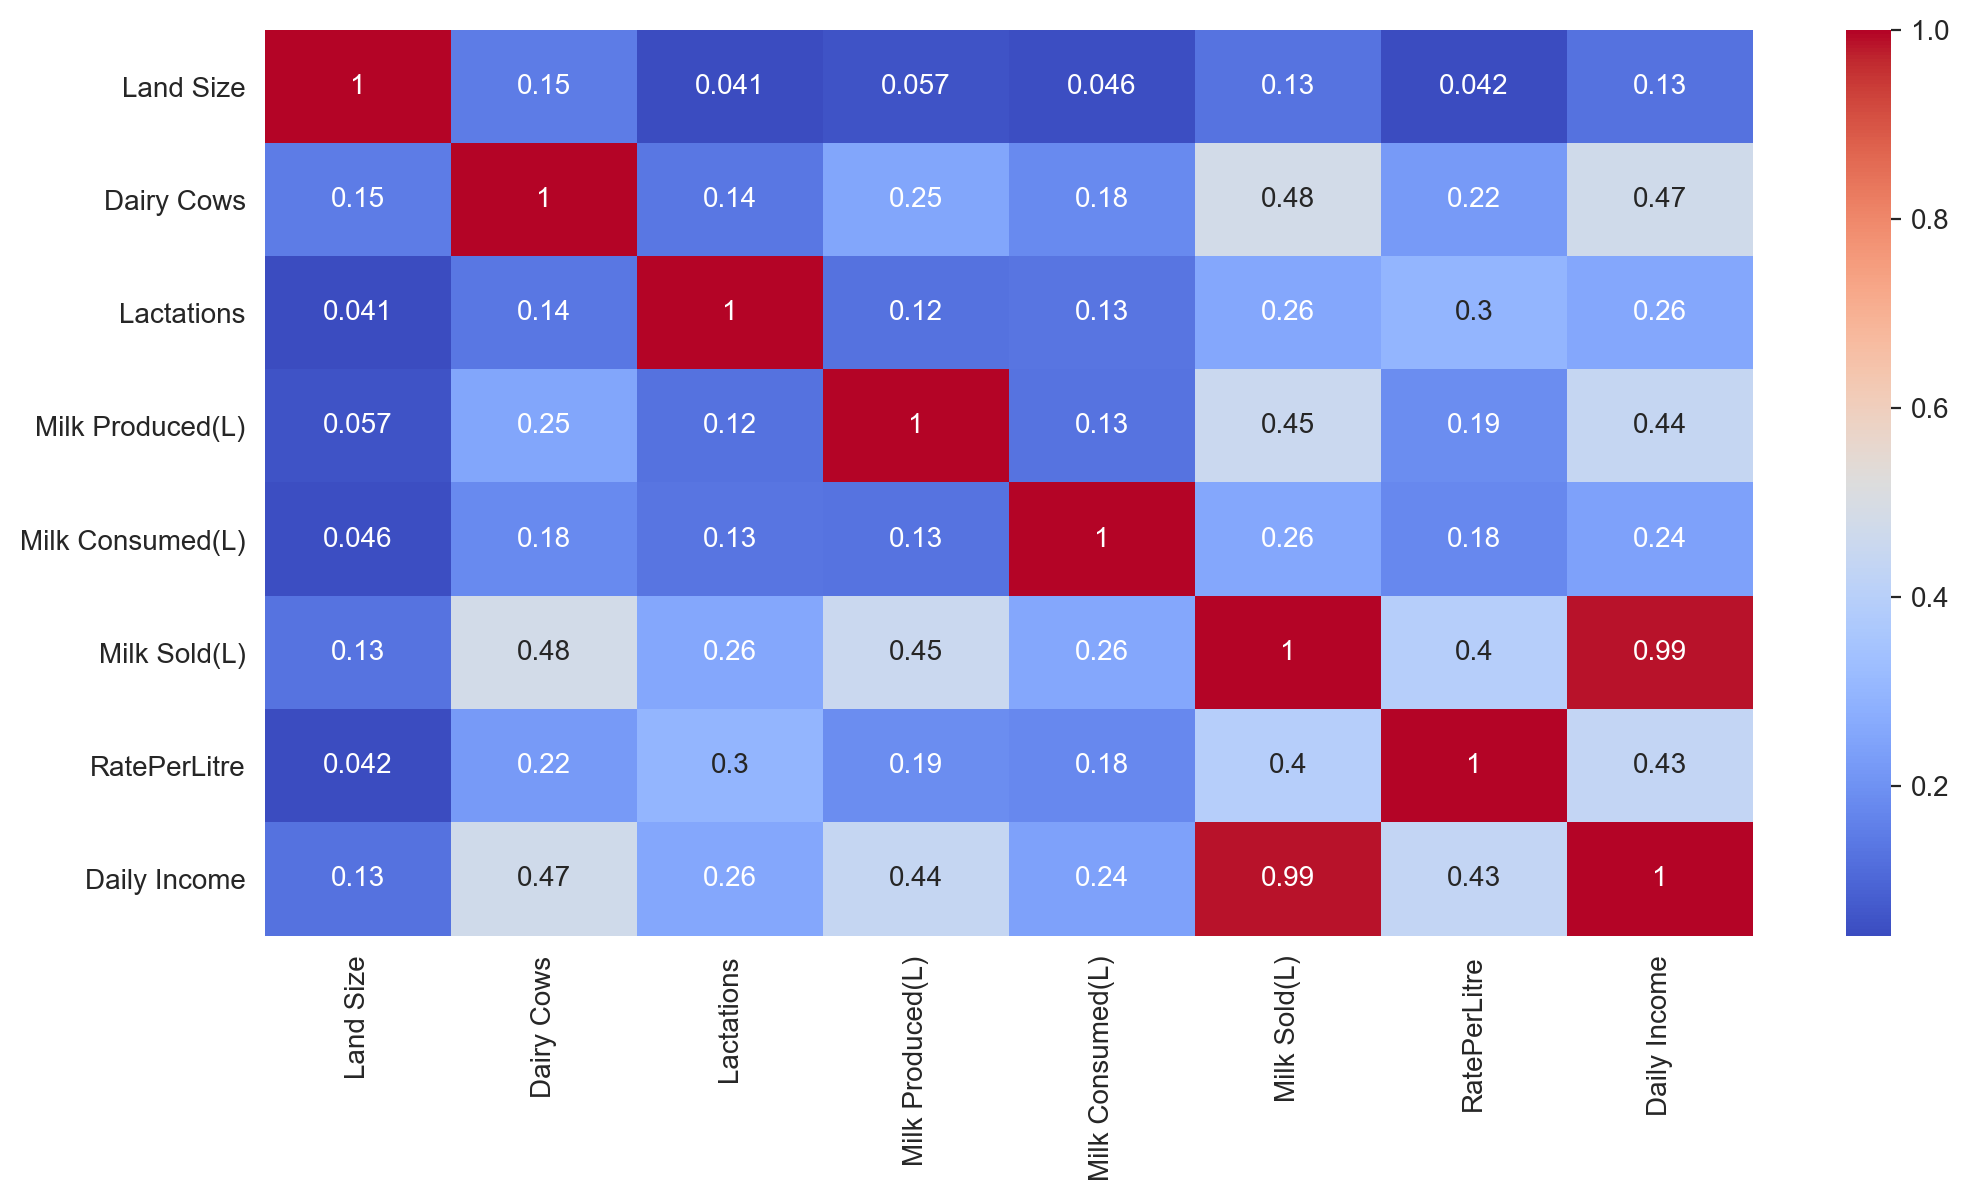

In [127]:
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(milk_data.corr(), cmap='coolwarm',annot=True)

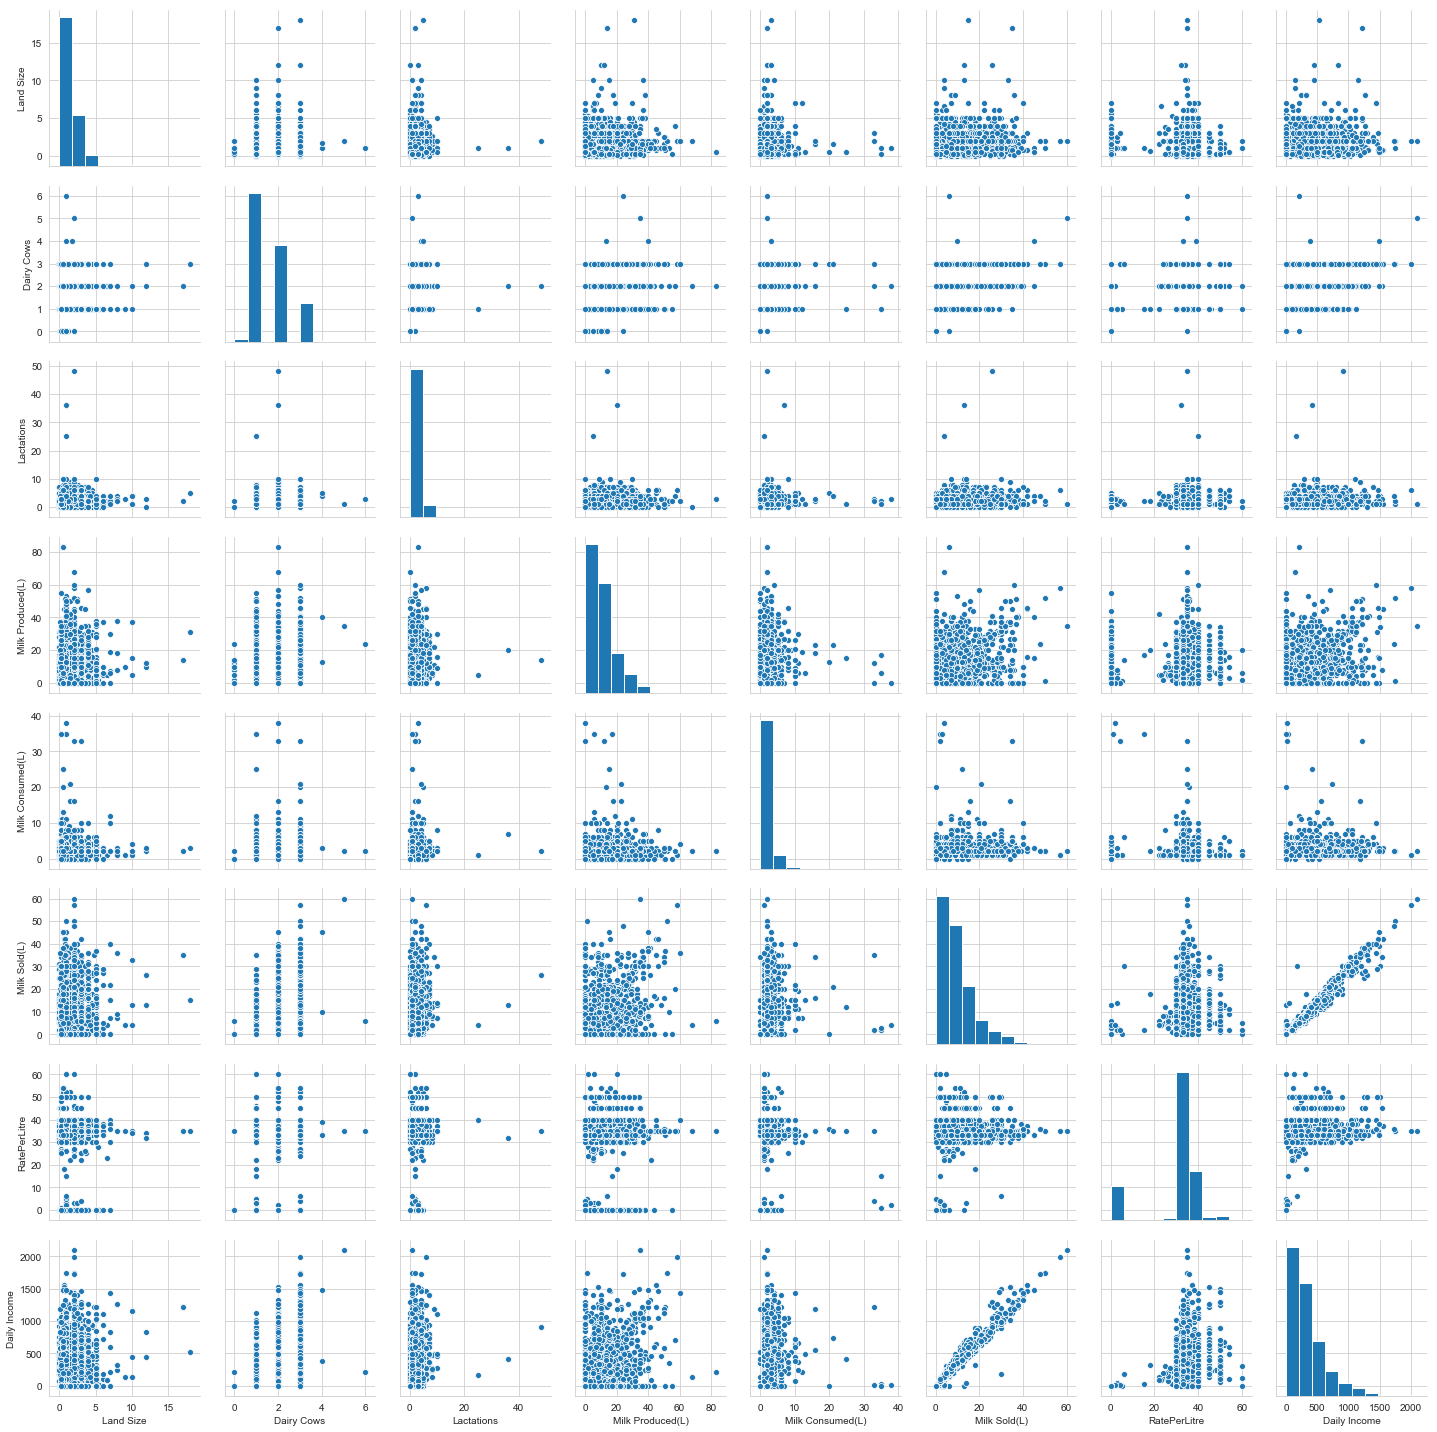

In [128]:
sns.pairplot(milk_data)

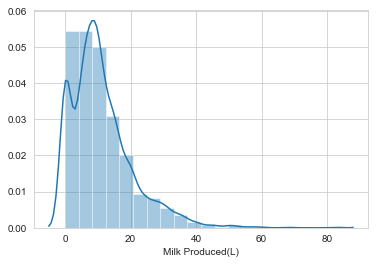

In [129]:
sns.distplot(milk_data['Milk Produced(L)'], bins=20)


From the plot we establish that most farmers produces milk between zero to 10 litres

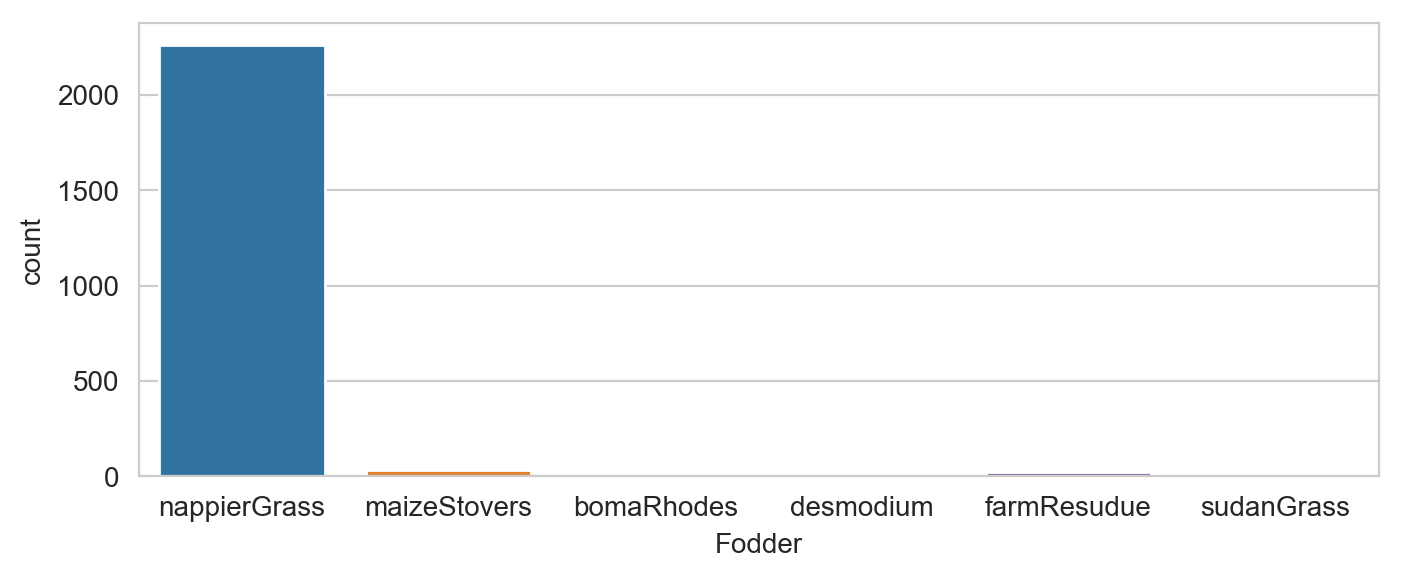

In [130]:
plt.figure(figsize=(8,3), dpi=200)
sns.countplot(x='Fodder', data= milk_data)

It is observed that the most commonly adopted fodder is nappier grass

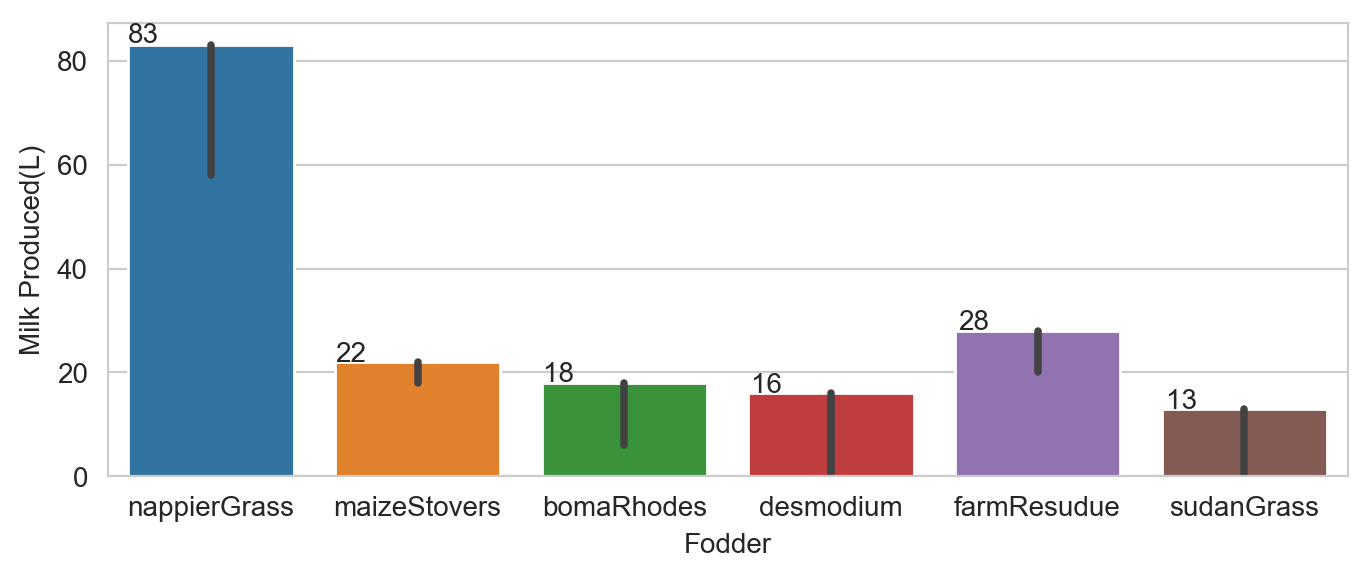

In [131]:
plt.figure(figsize=(8,3), dpi=200)
ax= sns.barplot(x='Fodder',y="Milk Produced(L)", data= milk_data, estimator=np.max)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Nappier grass similarly has a higher effect on milk production 

C:\Users\johan\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


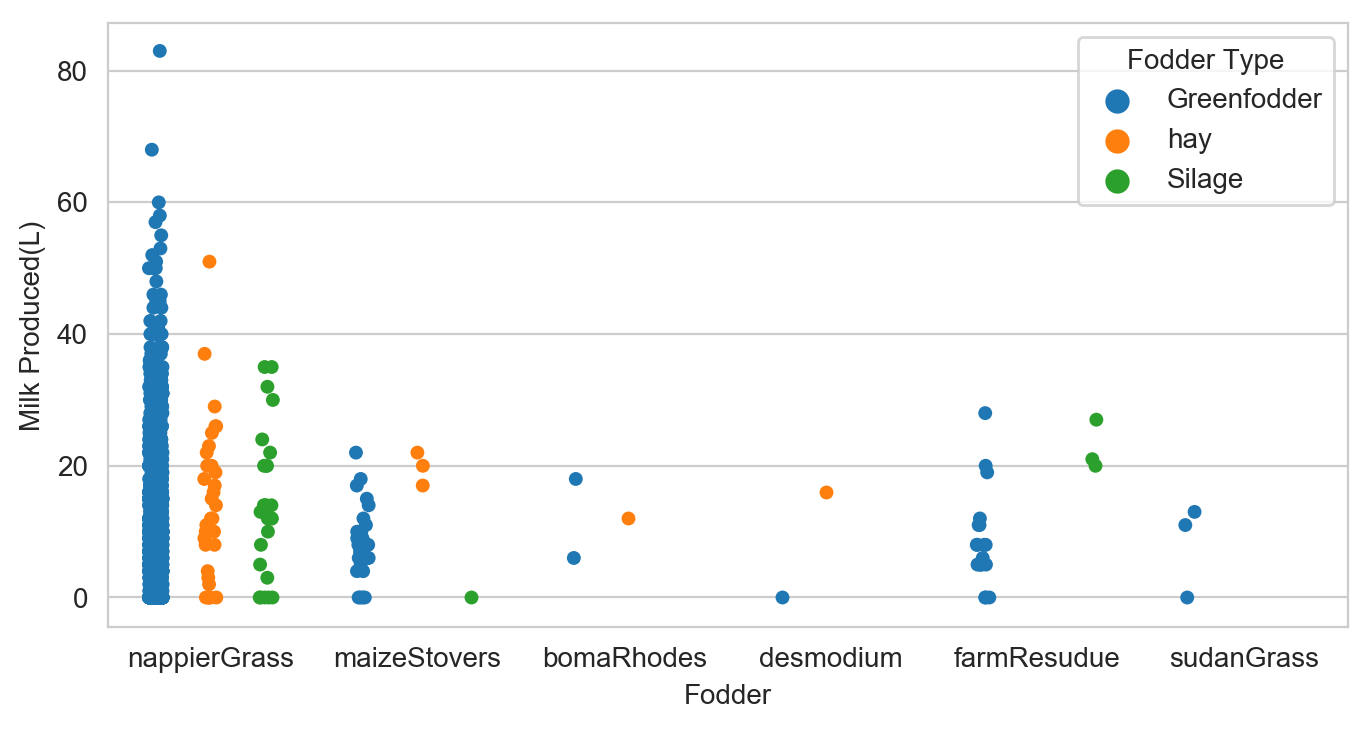

In [132]:
plt.figure(figsize=(8,4), dpi=200)
sns.stripplot(x='Fodder', y='Milk Produced(L)', hue= 'Fodder Type', data=milk_data, split=True)

Green fodder is prefered to other types of fodder

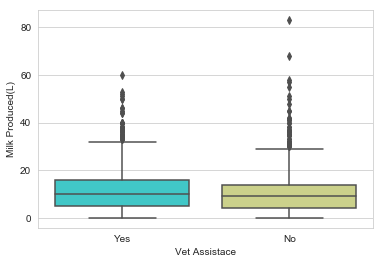

In [133]:
sns.boxplot(x='Vet Assistace',y="Milk Produced(L)",  data=milk_data, palette='rainbow')

Theres insignificant difference between milk produced by cattle acquiring and those with no veterinary assistance

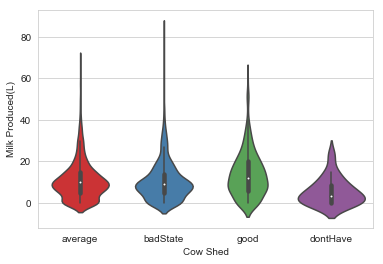

In [134]:
sns.violinplot(x='Cow Shed', y="Milk Produced(L)", data=milk_data, palette='Set1')

From the data, farmers with no cow sheds form the majority numbers and milk produces is close to zero litres followed by those with bad state cows shed. While farmers with average and good cow sheds having better milk production. On the contrary, the highest milk production is produced by those with bad state cow sheds.

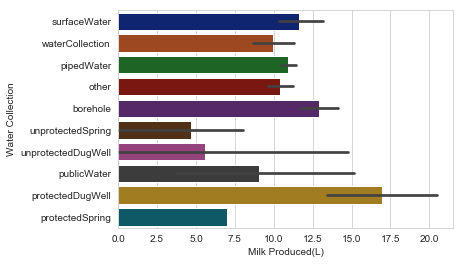

In [135]:
sns.barplot(y='Water Collection', x="Milk Produced(L)", data=milk_data, palette='dark')

Farmers with protected dug wells have better productivity of milk as opposed to those with unprotected springs. The other methods of water collection vary randomly.

### Converting from string categorical variable to numeric variable

In [136]:
milk_data.columns

Index(['Land Size', 'Fodder', 'Fodder Type', 'Cow Shed', 'Water Collection',
       'Vet Assistace', 'AI Services', 'Dairy Cows', 'Lactations',
       'Milk Produced(L)', 'Milk Consumed(L)', 'Milk Sold(L)', 'RatePerLitre',
       'Daily Income'],
      dtype='object')

In [137]:
x= milk_data[['Land Size', 'Fodder', 'Fodder Type', 'Cow Shed', 'Water Collection',
       'Vet Assistace', 'AI Services', 'Dairy Cows', 'Lactations']]
y= milk_data['Milk Produced(L)']
x = pd.get_dummies(data=x)
x.head()

Land Size  Dairy Cows  Lactations  Fodder_bomaRhodes  Fodder_desmodium  \
0        1.0           3           1                  0                 0   
1        1.0           1           1                  0                 0   
2        1.0           2           2                  0                 0   
3        1.0           2           0                  0                 0   
4        1.0           2           1                  0                 0   

   Fodder_farmResudue  Fodder_maizeStovers  Fodder_nappierGrass  \
0                   0                    0                    1   
1                   0                    0                    1   
2                   0                    0                    1   
3                   0                    0                    1   
4                   0                    0                    1   

   Fodder_sudanGrass  Fodder Type_Greenfodder       ...         \
0                  0                        1       ...          
1                  0                        1       ...          
2                  0                        1       ...          
3                  0                        1       ...          
4                  0                        1       ...          

   Water Collection_protectedSpring  Water Collection_publicWater  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   Water Collection_surfaceWater  Water Collection_unprotectedDugWell  \
0                              1                                    0   
1                              1                                    0   
2                              1                                    0   
3                              1                                    0   
4                              1                                    0   

   Water Collection_unprotectedSpring  Water Collection_waterCollection  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Vet Assistace_No  Vet Assistace_Yes  AI Services_No  AI Services_Yes  
0                 0                  1               0                1  
1                 0                  1               1                0  
2                 0                  1               1                0  
3                 0                  1               1                0  
4                 0                  1               1                0  

[5 rows x 30 columns]

### Training a Linear Regression Model 

Training a linear model involves spliting the data used into an X and Y arrays that contains features to be trained and the target variables. The Y array in our case will be the Milk production in litres


In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lm = LinearRegression()

In [142]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Model Evaluation 

In [143]:
print(lm.intercept_)

4.390788083541777


In [144]:
coeff_md = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

### Prediction from the model

In [145]:
predictions = lm.predict(x_test)

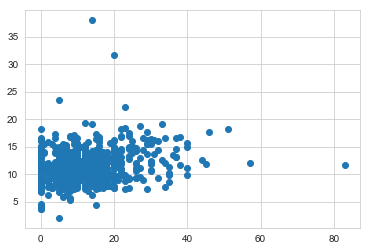

In [146]:
plt.scatter(y_test,predictions)

#### Residual Histogram

In [147]:
residual = y_test - predictions

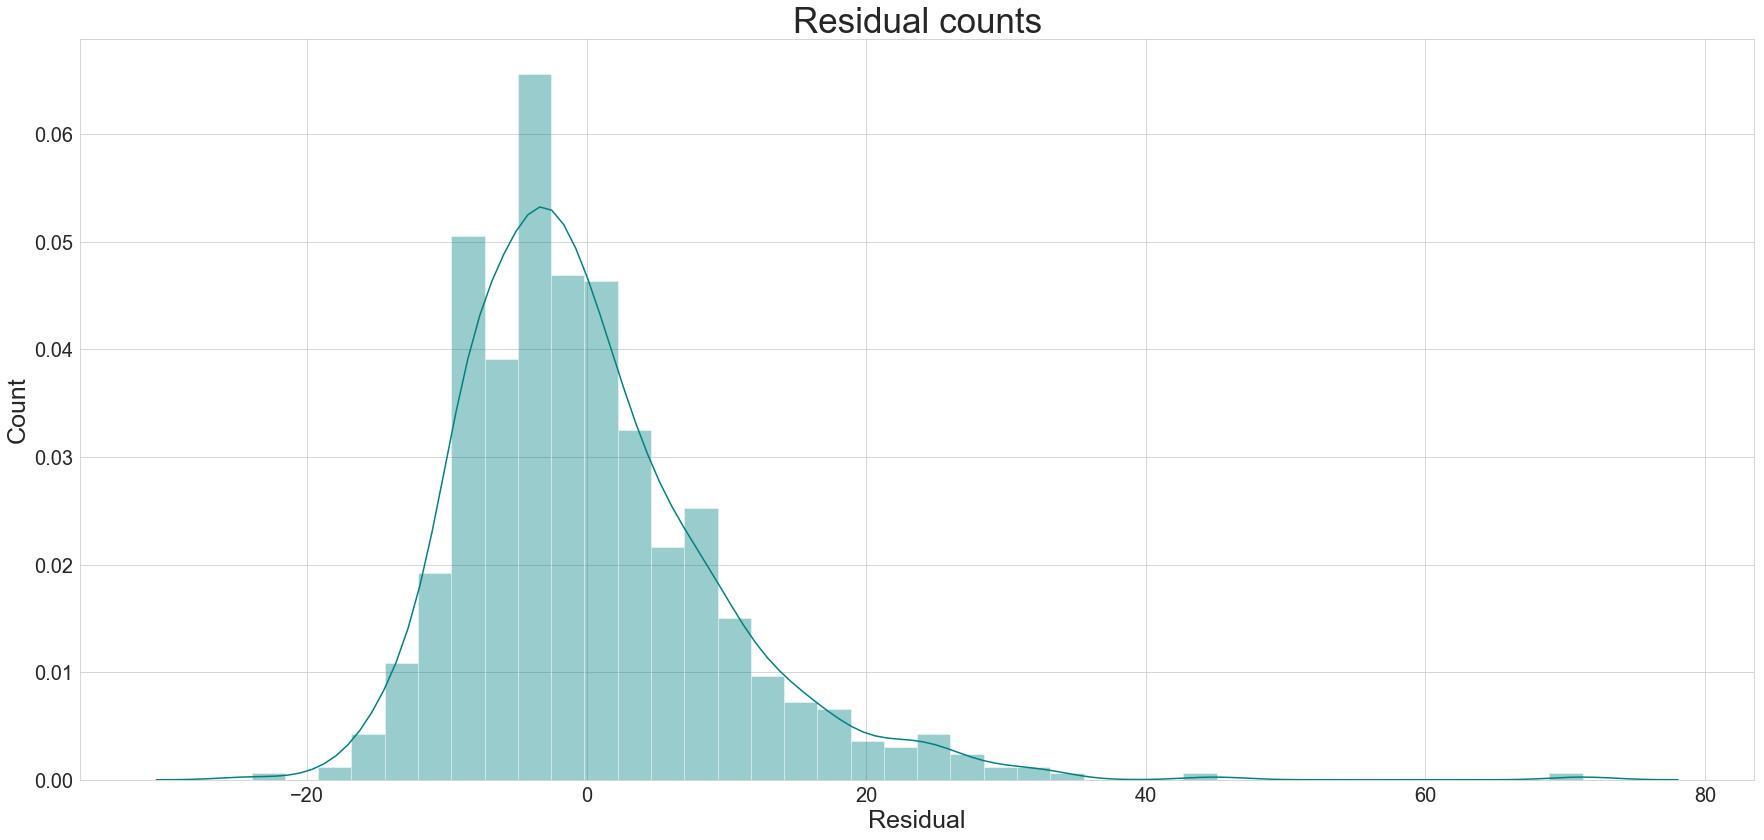

In [148]:
fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.show()

### Regression Evaluation Metrics 

The regression evaluation metrics that will be used include;
    Mean Absolute Error (MAE)- the mean of the absolute value of the errors,
    Mean Squared Error (MSE) - the mean of the squared errors, and
    Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [149]:
from sklearn import metrics

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.848530459897001
MSE: 86.06004392591653
RMSE: 9.276855282147961


### Decision Tree Regression 

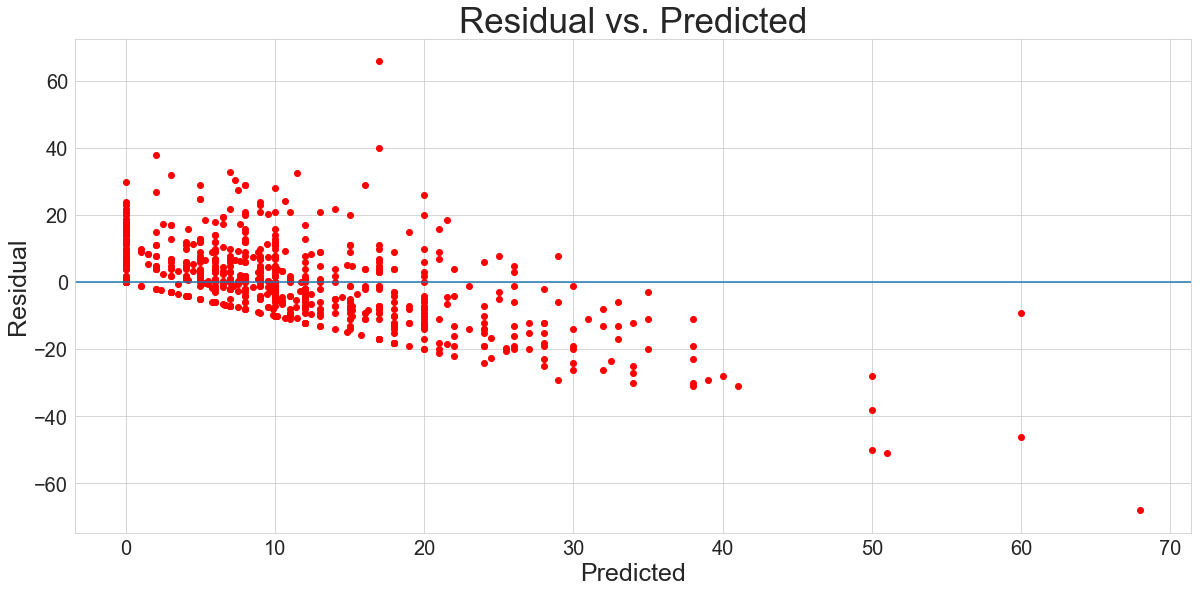

RMSE:
12.352875183923722


In [151]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(x_train, y_train)
predicted = dtr.predict(x_test)
residual = y_test - predicted

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(212)
plt.scatter(predicted, residual, color ='red')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

### Random Forest 

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtree = DecisionTreeRegressor(max_features='auto')
dtree.fit(x_train, y_train)
predicted = dtree.predict(x_test)
residual = y_test - predicted

In [154]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import pydot
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 


The model performed fairly well with an MAE of 6.8

### Model Deployment with Flask

In [ ]:
import pickle
from flask import Flask, request
import numpy as np
import pandas as pd

with open('C:/Users/johan/Desktop/ds/adn/api/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = Flask(__name__)


@app.route('/predict',methods=['POST'])   
def predict():
    
    prediction = model.predict([[np.array(['Land Size', 'Fodder', 'Fodder Type', 'Cow Shed', 'Water Collection',
       'Vet Assistace', 'AI Services', 'Dairy Cows', 'Lactations'])]])
    return str(prediction)

def predict_milk_data():
   
    input_data = pd.read_csv(request.files.get('C:/Users/johan/Desktop/ds/adn/Milk Baseline Data.csv'))
    prediction = model.predict(input_data)
    return str(list(prediction))

if __name__ == '__main__':
    app.run()